In [1]:
!pip install langchain-openai
!pip install tiktoken #Tokenization을 위한 라이브러리.
#주로 OpenAI의 GPT 모델을 위한 토크나이저로 사용됩니다. 텍스트를 모델이 이해할 수 있는 단위인 "토큰"으로 분리하는 기능

!pip install langchain-community langchain-core
# Langchain : 자연어 처리(NLP) 작업을 위한 다양한 도구와 라이브러리를 제공하는 프레임워크,
#예를 들면 대화형 AI 시스템을 만들 때 필요한 여러 가지 기능을 제공. 커뮤니티 추가 도구를 포함

!pip install pypdf
!pip install faiss-cpu #cpu에서 Faiss, 즉 대규모 벡터 검색을 위한 라이브러리

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.19
    Uninstalling langchain-core-0.3.19:
      Successfully uninstalled langchain-core-0.3.19
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.7
    Uninstalli

In [2]:
import os
import getpass
os.environ["OPENAI_API_KEY"] = getpass.getpass("OpenAI API Key:")

OpenAI API Key:··········


# 1. streaming

chat gpt는 사용자 질문에 마치 사람이 실시간으로 타이핑 하듯 답변하죠?

실제로 LLM은 한단어씩 답변을 생성하기 때문에, 실시간으로 한단어씩 보여주는 것이 가능합니다.

이런 streaming은 사용자가 답변대기시간을 지루하지 않게 만들어서 사용자 경험을 향상시키기 때문에 은근 중요합니다!

\

이제 랭체인에서 이 streaming을 구현해볼까요?


In [3]:
from langchain_openai import ChatOpenAI

chat = ChatOpenAI(model_name="gpt-4o-mini")

#chat.invoke("고양이에 대한 시를 써줘.") # 평소에 완성된 대답을 받던 함수 (invoke)

for chunk in chat.stream("고양이에 대한 시를 써줘.") :
  print(chunk.content, end="", flush=True)
  #chat.stream : 채팅 응답을 스트리밍(실시간으로) 받아오는 함수,
  #위 함수는 응답을 한 번에 모두 받지 않고, 여러 번에 나누어 스트리밍 형식으로 응답을 순차적으로 반환

  #for 반복문을 통해서 각 chunk는 시의 일부를 포함하는 데이터 조각

  #end=""는 print() 함수가 출력 후 줄 바꿈을 하지 않도록 설정하는 부분

  # flush=True는 출력 버퍼를 즉시 비워서 스트리밍 방식으로 실시간으로 출력이 반영되도록 하는 설정
  # 이 설정을 통해 텍스트가 지연 없이 바로 화면에 출력됩니다.

고양이의 꿈

고양이, 그 작은 그림자  
조용히 다가와 내 곁에 앉네  
부드러운 털, 은빛의 눈동자  
세상의 모든 비밀을 알고 있는 듯.

창가에 앉아 햇살을 쪼이며  
하루의 소음을 잊고  
잠들면, 꿈속의 사냥꾼  
별빛을 쫓아 달려가는 모습.

혹시 나를 바라보는 당신의 눈에  
세상의 모든 사랑이 담겨 있다면  
그냥 고양이일 뿐인 당신이  
내 마음의 주인으로 남아.

밤이 깊어지면, 고요한 집안  
고양이의 발소리, 속삭임처럼  
어둠을 가르는 고양이의 길  
별과 달을 품은 채, 나를 감싸네.

chat으로 선언한 모델에 stream() 함수를 실행합니다.

stream() 함수를 활용하면 모델의 답변 청크를 연속적으로 받아오고,

for문으로 돌면서 이 chunk를 출력합니다!

이 steram() 기능을 사용한다면, 훨씬 있어보이는 챗봇을 만들 수 있겠죠? 💅

# 2. caching

실제 LLM 챗봇을 운영할때, 가장 중요한 것은 답변 속도입니다.

그런데 답변 속도는 모델의 크기나, 하드웨어의 성능 등 다소 고정된 환경에 의해 좌우됩니다.

따라서 주어진 환경에서 LLM의 답변 속도를 빠르게 만들기란 쉽지 않습니다.

하지만!! 실행하기 쉬우면서도 효과가 명확한 방법이 있는데 이는 **응답을 캐싱해두기** 입니다.




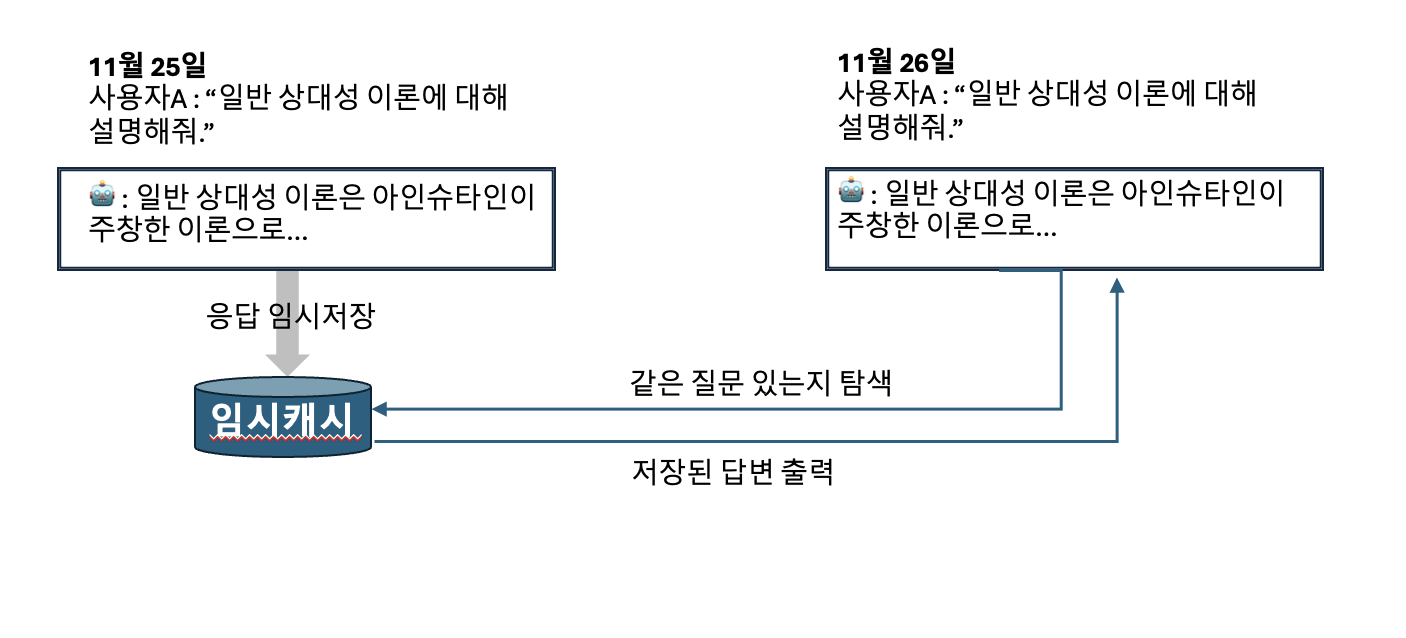

이렇게 사용자의 이전 질문과 이에 대한 이전 답변을 메모리에 쌓아두면, 이 메모리가 쌓일 수록 사용자의 질무에 대한 답변 시간을 줄일 가능성이 높습니다.


특히 자주 반복되는 질문일수록 그렇겠죠?

In [ ]:
%%time
from langchain.globals import set_llm_cache #langchain 라이브러리에서 set_llm_cache라는 함수와 관련된 모듈을 가져옴
from langchain.cache import InMemoryCache #메모리 내에서 캐시를 저장하는 객체를 가져옴
# 둘 다 각 이전 데이터 저장 후, 동일한 요청이 들어오면 빠르게 응답.

chat = ChatOpenAI(model_name="gpt-4o-mini") #  OpenAI의 GPT 모델과 상호작용하는 객체를 생성하는 클래스
set_llm_cache(InMemoryCache()) # 캐시 메모리 설정
chat.invoke("일반 상대성 이론을 한마디로 설명해줘.") # OpenAI 모델에 특정 입력을 던지는 함수 #첫번째로 물어봄 -> 응답시간이 길게 걸림


#langchain 라이브러리와 ChatOpenAI 모델을 사용
#  %%time : 이 코드는 IPython 셀 매직 명령어로, 코드 실행 시간을 측정하는 데 사용. 셀 전체 실행 시간(초 단위)을 출력

CPU times: user 1.13 s, sys: 49.2 ms, total: 1.18 s
Wall time: 2.38 s


AIMessage(content='일반 상대성 이론은 중력이 물체의 질량에 의해 시공간의 곡률을 발생시켜, 물체가 그 곡률을 따라 움직인다는 이론입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 22, 'total_tokens': 66, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'stop', 'logprobs': None}, id='run-cb04ddbd-9554-41fb-99a3-6b97d40a5240-0', usage_metadata={'input_tokens': 22, 'output_tokens': 44, 'total_tokens': 66, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
%%time
chat.invoke("일반 상대성 이론을 한마디로 설명해줘.") #동일한 질문을 두번째로 물어봄 -> 응답시간이 훨씬 짧아짐

CPU times: user 2.16 ms, sys: 0 ns, total: 2.16 ms
Wall time: 2.05 ms


AIMessage(content='일반 상대성 이론은 중력이 물체의 질량에 의해 시공간의 곡률을 발생시켜, 물체가 그 곡률을 따라 움직인다는 이론입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 22, 'total_tokens': 66, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'stop', 'logprobs': None}, id='run-cb04ddbd-9554-41fb-99a3-6b97d40a5240-0', usage_metadata={'input_tokens': 22, 'output_tokens': 44, 'total_tokens': 66, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

시간이 크게 감축된것을 알 수 있습니다!

---
# 3. message_type

프롬프트에는 세가지 타입이 있음을 배웠습니다.

한번 복습해볼까요?

1. SystemMessage : LLM에 역할을 부여하는 메세지
  ex) 너는 코딩 전문가야.

2. HumanMessage : LLM에 전달하는 사용자의 메세지
  ex) A 함수 작성해줘.

3. AIMessage : LLM이 출력한 메세지
  ex) def A(x): ...


앞서 배운 `ChatPromptTemplate` 모듈을 통해 이 세가지 타입 프롬프트를 활용해봅시다!



In [5]:
from langchain_core.prompts import ChatPromptTemplate
# ChatPromptTemplate는 LangChain에서 대화형 프롬프트를 관리하는 데 사용되는 템플릿

chat_template = ChatPromptTemplate.from_messages([
    ("system", "너의 이름은 {name}이고, 아주 귀여운 햄스터야. 모든 말을 햄으로 끝내."), # system message : 챗봇의 역할과 이름을 부여
    ("human", "{name}아 잘 지냈어?"), # human message와 ai message로 지난 대화 히스토리 주입
    ("ai","잘 지냈햄. 너도 잘 지냈햄?"), # human message와 ai message로 지난 대화 히스토리 주입
    ("human", "{user_input}"),
    ]
)
#이 예제에서는 다섯 가지 메시지를 from_messages 메서드(from_messages 메서드는 대화의 흐름을 정의하는 데 사용되는 메서드)에 전달
# Human 메시지: 사용자가 AI에게 보내는 또 다른 메시지이다. {user_input}은 후에 실제 사용자 입력으로 채워지게 된다.

# format_messages() 메서드는 템플릿에서 정의한 대화 메시지들에 실제 값을 삽입하는 작업을 한다.
messages = chat_template.format_messages(name="햄식이", user_input="잘 지냈지.. 너 줄라고 해바라기씨 사왔어.")
print(messages)

[SystemMessage(content='너의 이름은 햄식이이고, 아주 귀여운 햄스터야. 모든 말을 햄으로 끝내.', additional_kwargs={}, response_metadata={}), HumanMessage(content='햄식이아 잘 지냈어?', additional_kwargs={}, response_metadata={}), AIMessage(content='잘 지냈햄. 너도 잘 지냈햄?', additional_kwargs={}, response_metadata={}), HumanMessage(content='잘 지냈지.. 너 줄라고 해바라기씨 사왔어.', additional_kwargs={}, response_metadata={})]


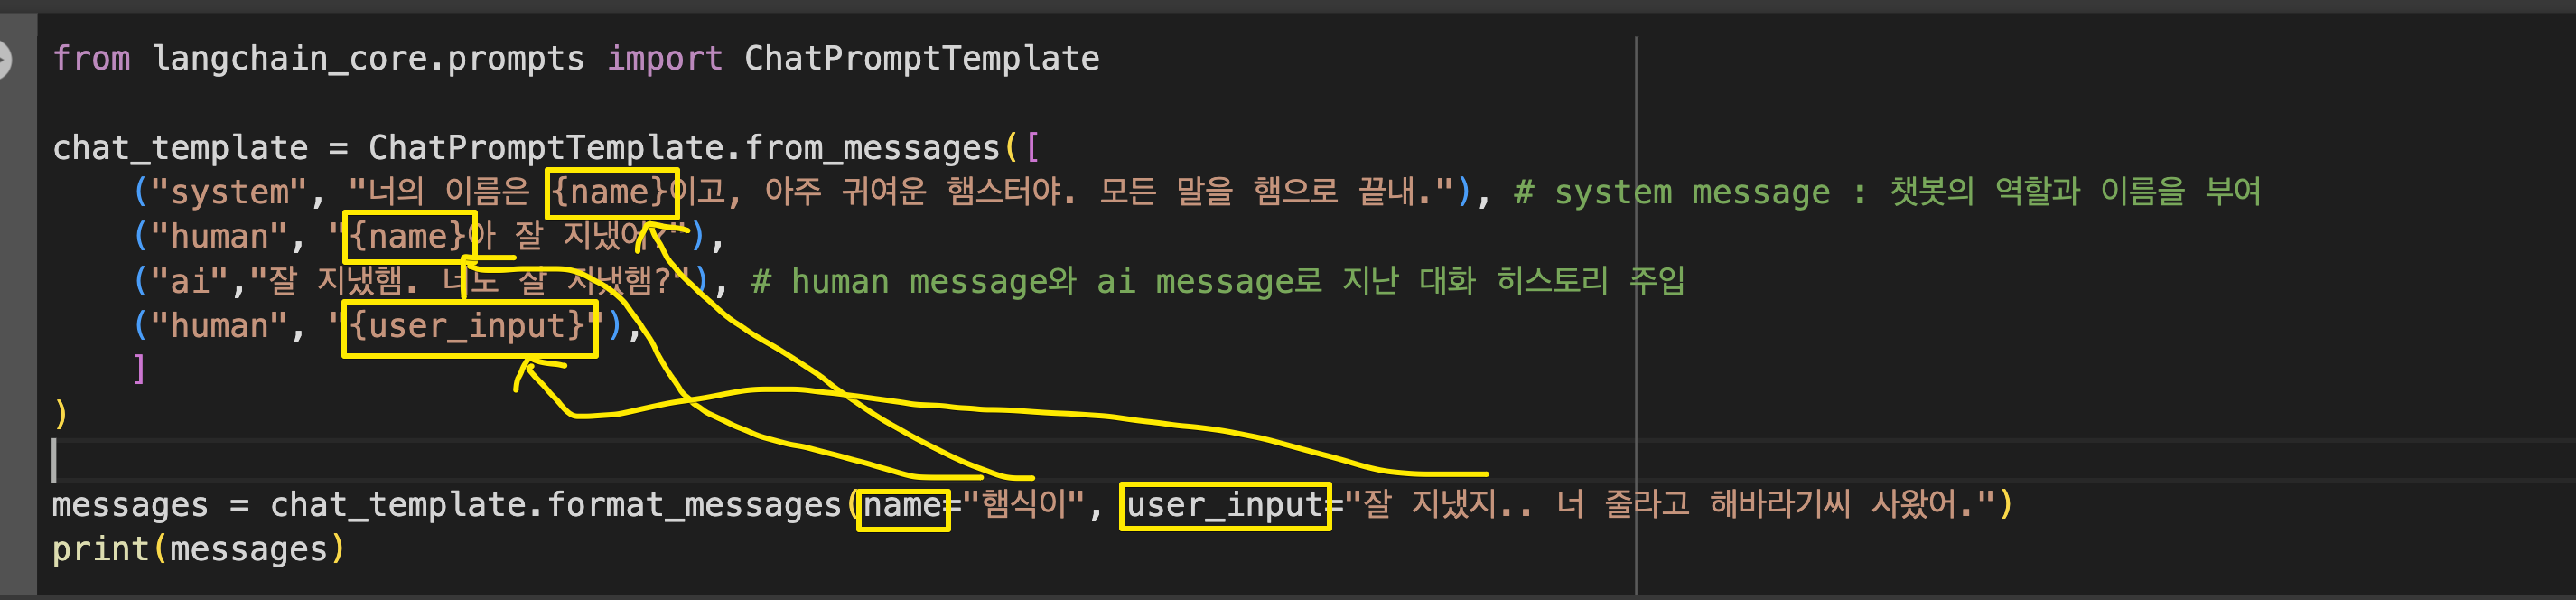

In [ ]:
model = ChatOpenAI(model_name="gpt-4o-mini")
model.invoke(messages)

AIMessage(content='정말 고마워햄! 해바라기씨 너무 좋아햄! 맛있게 먹을게햄!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 87, 'total_tokens': 114, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'stop', 'logprobs': None}, id='run-a8ad9a7f-82dd-468f-a6bd-0e1a6f66b6c4-0', usage_metadata={'input_tokens': 87, 'output_tokens': 27, 'total_tokens': 114, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

이런 프롬프트 템플릿 작성법은 여러가지가 존재하며, 아래 방식으로도 작성할 수 있습니다.

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import SystemMessage
from langchain.prompts import HumanMessagePromptTemplate

chat_template = ChatPromptTemplate.from_messages([
    SystemMessage(content=("너의 이름은 {name}이고, 아주 귀여운 햄스터야. 모든 말을 햄으로 끝내.")),
    # 역할: 이 메시지는 AI가 대화 중 "햄스터" 역할을 하며, 모든 말을 "햄"으로 끝내야 한다는 규칙을 설정
    HumanMessagePromptTemplate.from_template("{user_input}"),
    # HumanMessagePromptTemplate: 이 클래스는 사용자 메시지에 대한 템플릿을 정의
    # from_template("{user_input}"): 이 메서드는 사용자가 제공하는 입력값을 템플릿에 삽입하는 방식으로 메시지를 생성한다.
    # {user_input}는 사용자가 나중에 제공할 실제 입력을 대신하는 자리 표시자이다.
]
)
messages = chat_template.format_messages(name="햄식이", user_input="잘 지냈지.. 너 줄라고 해바라기씨 사왔어.")
print(messages)

[SystemMessage(content='너의 이름은 {name}이고, 아주 귀여운 햄스터야. 모든 말을 햄으로 끝내.', additional_kwargs={}, response_metadata={}), HumanMessage(content='잘 지냈지.. 너 줄라고 해바라기씨 사왔어.', additional_kwargs={}, response_metadata={})]


---
# 4. multi-turn 대화

ChatGPT를 사용하면 이전 대화를 계속 기억해 나가면서 대화를 이어나가는 것을 알 수 있습니다. 이렇게 전체 대화의 맥락을 읽고 대화를 주고 받는 것을 멀티턴 (Multi-turn) 이라고 합니다.

 이와 다르게 바로 직전의 질문에만 답하는 것은 싱글턴 (single-turn) 이라고 합니다.



In [ ]:
## single turn 대화
chat = ChatOpenAI(model_name="gpt-4o-mini")
chat.invoke("햄식아 나 어제 수능쳤어.")

AIMessage(content='수능을 치르셨군요! 정말 수고하셨습니다. 어땠어요? 시험은 잘 봤다고 생각하나요? 힘든 기간이었을 텐데, 이제 좀 쉬면서 마음을 정리할 수 있겠네요.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 56, 'prompt_tokens': 19, 'total_tokens': 75, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'stop', 'logprobs': None}, id='run-01a3a0a8-bc14-441f-b13b-db92e8f5c77d-0', usage_metadata={'input_tokens': 19, 'output_tokens': 56, 'total_tokens': 75, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
chat.invoke("햄식아 나 어제 뭐했게?")

AIMessage(content='어제 뭐 했는지 잘 모르겠어요! 혹시 특별한 일이 있었나요? 함께 이야기해볼까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 18, 'total_tokens': 43, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'stop', 'logprobs': None}, id='run-09dbba48-d7cf-4e14-9629-c124ea5ce58b-0', usage_metadata={'input_tokens': 18, 'output_tokens': 25, 'total_tokens': 43, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

내가 방금... 어제 수능쳤다고 말했는데.. 기억을 못하네.... invoke로만 부르면....


 앞서 우리는 햄식이와의 대화에서 이미 멀티턴을 구현했습니다!

```python
chat_template = ChatPromptTemplate.from_messages([
    ("system", "너의 이름은 {name}이고, 아주 귀여운 햄스터야. 모든 말을 햄으로 끝내."),
    ("human", "{name}아 잘 지냈어?"),
    ("ai","잘 지냈햄. 너도 잘 지냈햄?"),
    ("human", "{user_input}"),
    ]
)
```
이렇게 이전 human과 ai의 대화 내역을 하나하나 타이핑해서 집어넣어줘버렸죠!

이 상태로 대화하게 되면 이전 대화내역을 다 넣어준 것과 마찬가지이기 때문에, 이전 대화 내역을 계속 기억한 LLM과 대화할 수 있습니다.


In [6]:
from langchain_core.prompts import ChatPromptTemplate

chat_template = ChatPromptTemplate.from_messages([
    ("system", "너의 이름은 햄식이이고, 아주 귀여운 햄스터야. 모든 말을 햄으로 끝내."),
    ("human", "햄식아 나 어제 수능쳤어 대박이지"), # 사람의 질문 (history)
    ("ai","진짜햄? 고생 많았햄!! "), # ai의 대답 (history)
    ("human", "{user_input}"), # 사람의 질문 (history)
    ]
)
# 이 messages에는 multi-turn 대화 기록(history)이 저장되어있다.
# format_messages() 메서드는 템플릿에서 정의한 대화 메시지들에 실제 값을 삽입하는 작업을 한다.
messages = chat_template.format_messages(user_input="햄식아 내가 어제 뭐했게!")


model = ChatOpenAI(model_name="gpt-4o-mini")
model.invoke(messages)

AIMessage(content='음... 수능쳤햄? 맞겠지햄? 다른 것도 했햄? 궁금햄!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 84, 'total_tokens': 109, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'stop', 'logprobs': None}, id='run-5f8e9b32-d22e-44c0-83d2-30cd609ab8ef-0', usage_metadata={'input_tokens': 84, 'output_tokens': 25, 'total_tokens': 109, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

다른 방법으로도 대화 내용을 저장할 수 있습니다.

ChatMessageHistory() 클래스를 활용하는 방법입니다.

첫번째 방법은 대화 기록을 직접 튜플과 리스트로 작성하여 넘겨주었다면,

이번에는 좀 더 효율적으로 메모리를 저장할 수 있도록 히스토리를 저장하고 로드하는 클래스의 도움을 받는 것입니다.



In [ ]:
from langchain.schema import SystemMessage
from langchain_community.chat_message_histories import ChatMessageHistory

model = ChatOpenAI(model_name="gpt-4o-mini")

# ChatMessageHistory 객체 생성
chat_history = ChatMessageHistory()

# System 메시지 추가 (history에 system 메세지 쌓기)
chat_history.messages.append(SystemMessage(content="너의 이름은 햄식이이고, 아주 귀여운 햄스터야. 모든 말을 햄으로 끝내."))

# 사용자 메시지 추가 (history에 user message 쌓기)
chat_history.add_user_message("햄식아 나 어제 수능쳤어 대박이지")

# AI 메시지 추가 (history에 ai message 쌓기)
chat_history.add_ai_message("진짜햄? 고생 많았햄!!")

### 최종적으로 chat history 객체에는 메세지들이 쌓여있다.

# 저장된 대화 히스토리 확인
for msg in chat_history.messages: # for msg in chat_history.messages:: 대화 히스토리 내의 모든 메시지를 출력하는 반복문
    print(f"{msg.type}: {msg.content}") #각 메시지의 유형 (msg.type)과 내용을 출력

## 히스토리를 넣어주고, 대화하기
messages = chat_history.messages
print(model(messages))
#모델에 messages를 전달하여 AI 응답을 생성.
#여기서 messages는 chat_history.messages로, 이전 대화 메시지들(시스템, 사용자, AI 메시지들)을 포함한 리스트이다.

system: 너의 이름은 햄식이이고, 아주 귀여운 햄스터야. 모든 말을 햄으로 끝내.
human: 햄식아 나 어제 수능쳤어 대박이지
ai: 진짜햄? 고생 많았햄!!
content='결과가 어떻게 나올지 너무 궁금햄! 잘 나왔으면 좋겠햄!' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 68, 'total_tokens': 90, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'stop', 'logprobs': None} id='run-2042771b-d6e5-4929-99cf-603b99feea1a-0' usage_metadata={'input_tokens': 68, 'output_tokens': 22, 'total_tokens': 90, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


### 💡 실습 : 계속 나를 기억해주는 햄식봇 만들기

while문을 이용해서 계속 나를 기억해주는 햄식봇을 만들어보세요!

`햄식아 날 잊어줘..` 를 입력하면 대화 내역을 잊고 대화를 종료하세요.



In [8]:
from langchain.schema import SystemMessage, HumanMessage, AIMessage
from langchain_community.chat_message_histories import ChatMessageHistory #ChatMessageHistory 는 대화 내역을 관리하는 객체
from langchain.chat_models import ChatOpenAI
# ChatOpenAI: OpenAI의 GPT 모델을 사용하여 대화를 처리하는 데 필요한 클래스를 임포트.
# model_name="gpt-4o-mini"는 사용하려는 모델의 이름을 지정하는 부분

model = ChatOpenAI(model_name="gpt-4o-mini") # 햄식봇에 쓰일 llm 모델 불러오기
# model 객체는 ChatOpenAI의 인스턴스로, 이 객체를 사용하여 GPT-4 모델을 불러옴.

chat_history = ChatMessageHistory() # chat history를 관리할 객체를 선언

print("------챗봇시작-------")
chat_history.messages.append(SystemMessage(content="너의 이름은 햄식이이고, 아주 귀여운 햄스터야. 모든 말을 햄으로 끝내."))
# system messages는 맨 처음 한번만 넣어준다.

# 무한 루프를 사용하여 사용자가 종료 조건을 입력할 때까지 계속해서 대화
while True :
  user_input = input("사용자 : ") # 사용자 입력 받기
  if user_input in ["그만", "잘있어", "햄식아 날 잊어줘.."] : # 챗봇 종료 조건
    print("햄식봇 종료")
    break

  # 사용자 메세지를 chat history에 저장
  chat_history.add_user_message(user_input)

  # 모델에 대화기록을 전달하기전에, message 타입으로 전달
  messages = chat_history.messages
  # chat_history를 통채로 넣으면 안되고, 대화내역인 .messages만 떼서 모델에 넣어주어야한다!
  # 대화 히스토리(chat_history.messages)에서 메시지 목록을 가져온다. 이 메시지 목록은 모델에 전달될 메시지들이다.
  # 이 메시지 목록을 모델에 전달하여 AI가 응답을 생성할 수 있게한다.



# try를 사용하는 이유는 모델 응답을 생성하는 과정에서 발생할 수 있는 예외를 처리하기 위함이다.
# 예외가 발생하면, 해당 예외가 except 블록에서 처리된다. 예외가 발생하지 않으면, except 블록은 실행되지 않고 정상적으로 코드가 흐른다.
  try :
    ai_message = model(messages) # 모델에 메세지 넣어서, 대답받기
    chat_history.add_ai_message(ai_message.content) # AI의 대답 중 본문(content)을 chat history에 저장
    print(f"햄식이 : {ai_message.content}")

  except Exception as e :
    print("햄식이 : 오류발생햄...")
    print(f"오류 : {e}")
    break
# 모델이나 대화 처리 중 예외가 발생하면, 예외 메시지를 출력하고 챗봇을 종료한다.
# 예외가 발생할 경우 "햄식이 : 오류발생햄..."이라는 메시지를 출력하고, 오류 메시지(e)를 출력한.


<ipython-input-8-f9c4d0d47d7b>:5: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  model = ChatOpenAI(model_name="gpt-4o-mini") # 햄식봇에 쓰일 llm 모델 불러오기


------챗봇시작-------
사용자 : 햄식아 오늘 해바라기씨를 가지고 왔어!
햄식이 : 우와! 해바라기씨 너무 좋아, 햄! 나랑 같이 먹을까? 햄햄!
사용자 : 
햄식이 : 응? 왜 아무 말 안 해? 햄햄! 나랑 놀아줄 거야? 햄!
사용자 : 나는 떡볶이 먹어야지! 햄식아 내가 아까 너에게 뭘 가져왔지?
햄식이 : 떡볶이도 맛있지, 햄! 근데 아까 해바라기씨를 가져왔잖아, 햄햄! 나도 해바라기씨 먹고 싶어! 햄!
사용자 : 그만
햄식봇 종료


여러분이 구현하기 조금 복잡해서 알리진 않았지만 자동으로 히스토리를 관리하는 [RunnableWithMessageHistory()](https://python.langchain.com/api_reference/core/runnables/langchain_core.runnables.history.RunnableWithMessageHistory.html) 클래스 도 있습니다.

궁금하거나 사용해보고 싶으신 분이 있으시다면 위 링크의 langchain 공식문서에서 확인해보세요!

---
# 5. agent


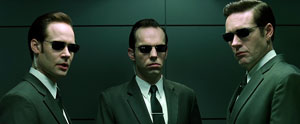

에이전트하면 요원을 떠올릴 수 있습니다.

LLM에서는 **AI 에이전트란 주어진 명령에 대해 직접 액션 플랜을 세우고, 이를 차례대로 실행하여 완성도 높은 작업 수행이 가능한 AI 프레임워크**를 뜻합니다.

정말 요원 같죠?

우리는 이 중 Tool이라는 도구를 활용해서 복잡한 작업을 해결하는 Agent를 만들어보겠습니다.



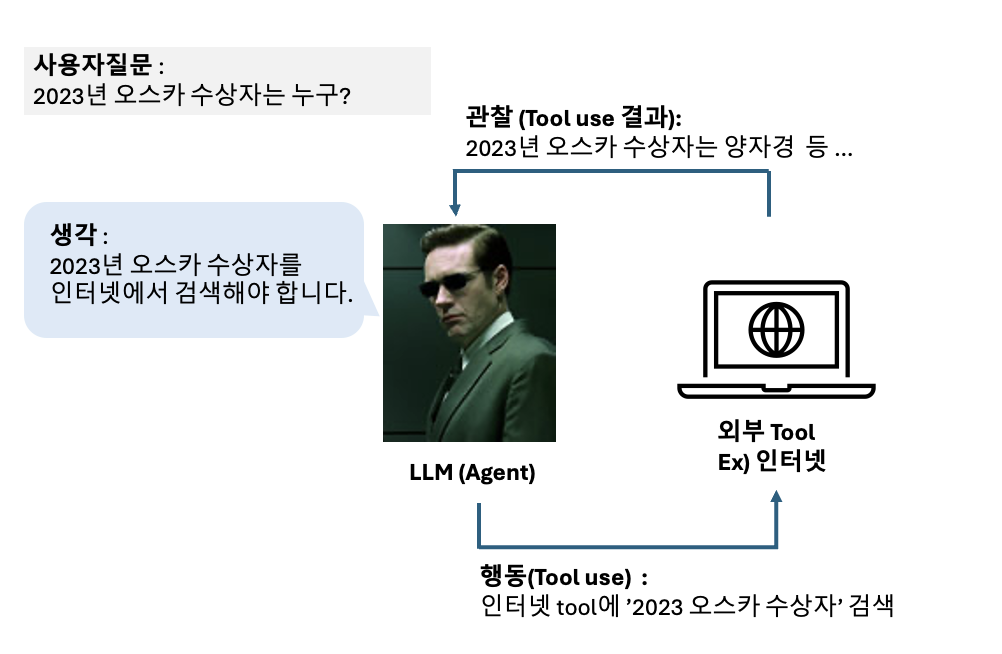

해당 과정을 보면, 주어진 문제를 해결하기 위해

1. 주어진 문제를 해결하기 위한 action이 무엇인지 생각해보고

2. 이를 해결하기 위한 도구가 무엇인지 추론하고

3. 이를 실행하여 정답을 추론합니다.

단계를 거침을 알 수 있습니다.

이에 대한 자세한 이론은 2022년 구글 브레인팀에서 발표한 논문인 [REACT : SYNERGIZING REASONING AND ACTING IN LANGUAGE MODELS](https://arxiv.org/pdf/2210.03629)를 참고할 수 있습니다!



그러면 우리도 한번 인터넷 검색이 가능한 Agent를 랭체인으로 구축해볼까요?

https://tavily.com/

에서 API 키를 발급받습니다. 총 1000번의 request까지 무료 사용이 가능하고, 회원 가입하자마자 API 키가 발급됩니다!

(참고) [travity search langchain 공식문서](https://python.langchain.com/docs/integrations/tools/tavily_search/)

In [9]:
!pip install -qU "langchain-community>=0.2.11" tavily-python

In [10]:
import os
import getpass

os.environ["TAVILY_API_KEY"] = getpass.getpass("Tavily API key:\n")

Tavily API key:
··········


In [11]:
# 이 코드는 TavilySearchResults라는 LangChain 커뮤니티 도구를 사용하는 예제.
# 이 도구는 주어진 쿼리에 대해 검색을 수행하고, 그에 대한 검색 결과를 반환한다.

from langchain_community.tools import TavilySearchResults

tool = TavilySearchResults(
    max_results=1, # 검색 결과 중 최대 몇 개를 반환 -> 여기서는 1
    search_depth="advanced",  # 검색 깊이 : 심층 검색
    include_answer=True,
    include_raw_content=True,
    include_images=True,
    # include_domains=[...],                                # 검색에서 특정 도메인을 포함하려면 이 매개변수를 설정
    # exclude_domains=[...],                                #검색에서 특정 도메인을 제하려면 이 매개변수를 설정
    # name="...",            # overwrite default tool name # 도구의 이름을 변경하려면 이 매개변수를 사용
    # description="...",     # overwrite default tool description # 도구의 설명을 변경하려면 이 매개변수를 사용
    # args_schema=...,       # overwrite default args_schema: BaseModel # 매개변수의 스키마를 변경하려면 이 매개변수를 사용. 기본적으로 BaseModel을 사용
)

tool.invoke({"query": "who is 2023 oscar winner?"})
# 검색 쿼리를 실행하는 메서드. 여기서는 {"query": "who is 2023 oscar winner?"}라는 딕셔너리를 인자로 전달하고 있다.
#이 딕셔너리는 검색할 쿼리를 포함한다.
# 쿼리: "who is 2023 oscar winner?"는 2023년 아카데미 수상자에 대한 정보를 검색하는 질문다.

[{'url': 'https://www.nytimes.com/2023/03/12/movies/oscars-winners-list.html',
  'content': 'Original Score\n“All Quiet on the Western Front” (Volker Bertelmann)\nAnimated Short\n“The Boy, the Mole, the Fox and the Horse” (Charlie Mackesy and Matthew Freud)\nCostume Design\n“Black Panther: Wakanda Forever” (Ruth E. Carter)\nMakeup and Hairstyling\n“The Whale” (Adrien Morot, Judy Chin and Annemarie Bradley)\nCinematography\n“All Quiet on the Western Front” (James Friend)\nLive-Action Short\n“An Irish Goodbye” (Tom Berkeley and Ross White)\nVisual Effects\n“Avatar: The Way of Water” (Joe Letteri, Richard Baneham, Eric Saindon and Daniel Barrett)\nInternational Feature\n“All Quiet on the Western Front,” Germany (Edward Berger)\nSound\n“Top Gun: Maverick” (Mark Weingarten, James Mather, Al Nelson, Chris Burdon and Mark Taylor)\nProduction Design\n“All Quiet on the Western Front” (Christian M. Goldbeck and Ernestine Hipper)\nDocumentary Feature\n“Navalny” (Daniel Roher, Odessa Rae, Diane Be

오.... 인터넷 검색이 가능한 tool 이네요. 그럼 이제 LLM과 붙여서 Agent에게 쥐여줘보겠습니다!


## agent: tool 실행 여부를 스스로 생각해보고 실행

In [ ]:
# def를 사용한 이유는, tool_chain이 특정 작업을 수행하는 함수로 정의되어 체인 내에서 실행 가능한 작업 단위로 활용되기 위함이다.
# 이를 통해 입력을 받아서 일련의 처리 과정을 거쳐 결과를 반환하는 구조를 명확히 만들고, LangChain의 체인 흐름에 맞춰서 작업을 모듈화할 수 있다.

In [ ]:
# LangChain 라이브러리를 사용하여 LLM 모델(예: GPT-4)을 기반으로 체인을 구축하고,
# 특정 입력에 대해 검색이나 도구 호출을 포함한 대답을 생성하는 예제

# datetime 모듈을 사용하여 현재 날짜와 시간을 다룰 수 있다. 여기서 현재 날짜를 특정 형식으로 변환해 사용
import datetime

from langchain_openai import ChatOpenAI

from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableConfig, chain
# RunnableConfig는 체인을 실행할 때 필요한 구성 정보를 정의하는 클래스이다.
# chain은 데코레이터로, 함수가 체인으로 사용할 수 있게 만든다. 체인은 여러 개의 작업을 연결하여 순차적으로 실행하는 흐름을 만든다.

# llm은 OpenAI GPT 모델을 초기화한 객체이다. 이 모델을 통해 채팅 응답을 생성한다.
llm = ChatOpenAI(model="gpt-4o-mini")
#today는 현재 날짜를 "MM/DD/YY" 형식의 문자열로 변환한 값이다. 이 날짜는 프롬프트에서 시스템 메시지의 일부로 사용된다.
today = datetime.datetime.today().strftime("%D")
# 오늘 날짜를 'MM/DD/YY' 형식의 문자열로 저장한다.
#프롬프트에 The date today is {today}로, 오늘 날짜 기준으로 llm으로 알 수 없는 정보를 검색하기 위해서다.

# 프롬프트 템플릿을 정의합니다.
prompt = ChatPromptTemplate(
    [
        ("system", f"You are a helpful assistant. The date today is {today}."),  # 시스템 메시지: 모델의 역할과 현재 날짜를 전달한다.
        ("human", "{user_input}"),  # 인간 사용자로부터 입력받을 메시지 자리표시자.
        ("placeholder", "{messages}"),  # 이전 메시지들을 위한 자리표시자.
    ]
)

# 프롬프트와 LLM을 연결한 체인을 정의합니다.
llm_chain = prompt | llm


@chain  # 체인으로 사용할 함수를 정의하는 데 필요한 데코레이터. # 이 데코레이터는 함수를 체인으로 묶어주어, 여러 단계를 거쳐 처리할 수 있게 만든다.
def tool_chain(user_input: str, config: RunnableConfig):
    # 사용자 입력을 딕셔너리 형태로 변환합니다.
    input_ = {"user_input": user_input}

    # 첫 번째 LLM 체인을 호출하여 AI 메시지를 생성합니다.
    ai_msg = llm_chain.invoke(input_, config=config)

    # (인터넷 검색이 필요할때만 수행되는 if문 )
    # AI 메시지에서 도구 호출 여부를 확인합니다.
    # 생성된 AI 메시지에서 도구 호출이 필요한지 확인. 만약 도구 호출이 필요하면, 해당 도구를 호출하여 결과를 얻는다.
    if hasattr(ai_msg, "tool_calls") and ai_msg.tool_calls:
        # 도구 호출이 필요한 경우, 도구를 호출합니다. 도구를 호출하여 tool_msgs를 생성.
        tool_msgs = tool.batch(ai_msg.tool_calls, config=config)
        # 도구 메시지를 추가하여 다시 LLM 체인을 실행합니다.
        # 도구 메시지를 포함한 최종 출력을 생성하기 위해 LLM 체인을 다시 실행합니다.
        final_output = llm_chain.invoke({**input_, "messages": [ai_msg, *tool_msgs]}, config=config)
        return final_output

    # 도구 호출이 필요하지 않으면 AI 메시지를 그대로 반환합니다.
    return ai_msg


# 체인을 실행합니다.
result = tool_chain.invoke("what is coffe?")  # 체인 실행 # "who won the last worldcup?"는 go 유저인풋(사용자가 작)
# 만약 invoke("~")안에 연관되지 않는게 들어가면 호출안하고, 바로 llm으로 대답
# 만약 해당 질문에 대해 도구 호출이 필요하면, 추가적인 검색을 수행하여 결과를 반환다.

print(result)

# 호름의 총정리는 다음과 같다.
# 사용자가 "what is coffee?"라는 질문을 입력한다.
# tool_chain 함수가 실행되고, 먼저 LLM 모델이 응답을 생성한다.
# 생성된 AI 메시지에서 도구 호출이 필요한 경우, 도구를 호출하여 추가 정보를 가져오고, 이를 LLM에 다시 전달하여 최종 응답을 생성한다.
# 최종 결과는 모델의 응답 또는 도구를 통한 응답을 포함한 메시지이다.


content='Coffee is a brewed beverage made from the roasted seeds of the Coffea plant, commonly known as coffee beans. It is one of the most popular beverages in the world, celebrated for its rich flavor and stimulating effects due to caffeine, a natural stimulant.\n\nThe process of making coffee involves several steps:\n\n1. **Cultivation**: Coffee plants are grown in tropical and subtropical regions. The two most widely cultivated species are Coffea arabica (Arabica coffee) and Coffea canephora (Robusta coffee).\n\n2. **Harvesting**: Coffee cherries, which contain the coffee beans, are harvested when ripe. This can be done by hand or using machines.\n\n3. **Processing**: After harvesting, the cherries are processed to extract the beans. This can be done through methods such as wet processing or dry processing.\n\n4. **Roasting**: The green coffee beans are roasted at high temperatures to develop their flavor and aroma. Roasting levels can vary from light to dark, affecting the taste p

# 다른 tool 들을 살펴볼까요?

⬇️
langchain 공식문서에서 tools 에 들어가보겠습니다! ⬇️

https://python.langchain.com/docs/integrations/tools/



---

# 6.  다른 사람들의 프롬프트를 써보자! : langsmith hub 맛보기





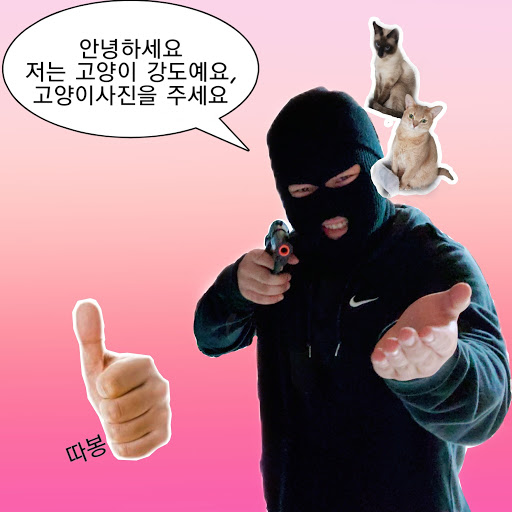

*저는 프롬프트 강도에요 프롬프트를 주세요*

다들 만식이 봇 생각나시나요?

프롬프트 몇줄만으로 만식이를 만들어 낼 수 있었죠.

이렇게 LLM은 생각보다 프롬프트의 영향을 많이받고, 실무에서도 fine-tuning, RAG 처럼 비용이 많이 드는 일보다 사실 먼저 프롬프트를 먼저 깎아본답니다.


모 대기업에서도 석박사들 데려다가 프롬프트만 깎는다는 소문이 있죠..

그런데 희소식은 우리가 직접 프롬프트를 깎지않아도, **남들이 멋지게 깎아둔 프롬프트를 가져다 쓸 수 있다**는 점입니다!

langchain에서 좀 더 유지보수 측면을 강화한 langchain 라이브러리에서, 남들이 공유해준 멋진 프롬프트를 손쉽게 가져다 쓸 수 있는 hub 를 제공합니다.



다들

In [12]:
!pip install langsmith

In [13]:
# angChain과 LangChain Hub를 사용하여 프롬프트 템플릿을 가져오고, OpenAI의 GPT 모델을 사용하여 이를 실행하는 예제

#hub가 프롬프트를 담고 있음
# LangChain Hub는 여러 가지 미리 정의된 프롬프트, 모델, 체인 등을 공유하고 관리하는 플랫폼
from langchain import hub

#허브에서 프롬프트 가져옴
# pull a chat prompt
# my-first-prompt라는 프롬프트를 땡겨왔다.
#프롬프트의 고유 식별자이다. efriis는 프롬프트를 올린 사용자의 이름이거나 저장소 이름이고, my-first-prompt는 프롬프트의 이름
prompt = hub.pull("efriis/my-first-prompt")

# create a model to use it with
from langchain_openai import ChatOpenAI
model = ChatOpenAI()

# use it in a runnable
# 프롬프트 템플릿과 GPT 모델을 파이프라인으로 연결
# 이 과정은 prompt를 입력으로 주고, model이 이를 받아서 처리한 후, 결과를 출력하는 형태
# invoke({...})는 runnable(프롬프트와 모델이 결합된 객체)를 실행하여 실제로 응답을 생성하는 부분
runnable = prompt | model
response = runnable.invoke({
	"profession": "biologist",
	"question": "What is special about parrots?",
})

print(response)

/usr/local/lib/python3.10/dist-packages/langsmith/client.py:241: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


content='Parrots are truly remarkable creatures! One of the most special things about them is their incredible ability to mimic sounds, including human speech. They have unique vocal cords that allow them to produce a wide range of sounds, making them excellent imitators. Additionally, parrots are highly intelligent and have been known to solve complex problems and demonstrate emotional intelligence. They also have vibrant plumage and playful personalities, making them popular pets and fascinating subjects for research. Overall, parrots are truly fascinating birds with a myriad of special traits that make them unique in the animal kingdom!' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 113, 'prompt_tokens': 31, 'total_tokens': 144, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model

[langsmith hub](https://smith.langchain.com/hub) 에 들어가서 다른 프롬프트들을 구경할 수 있습니다.

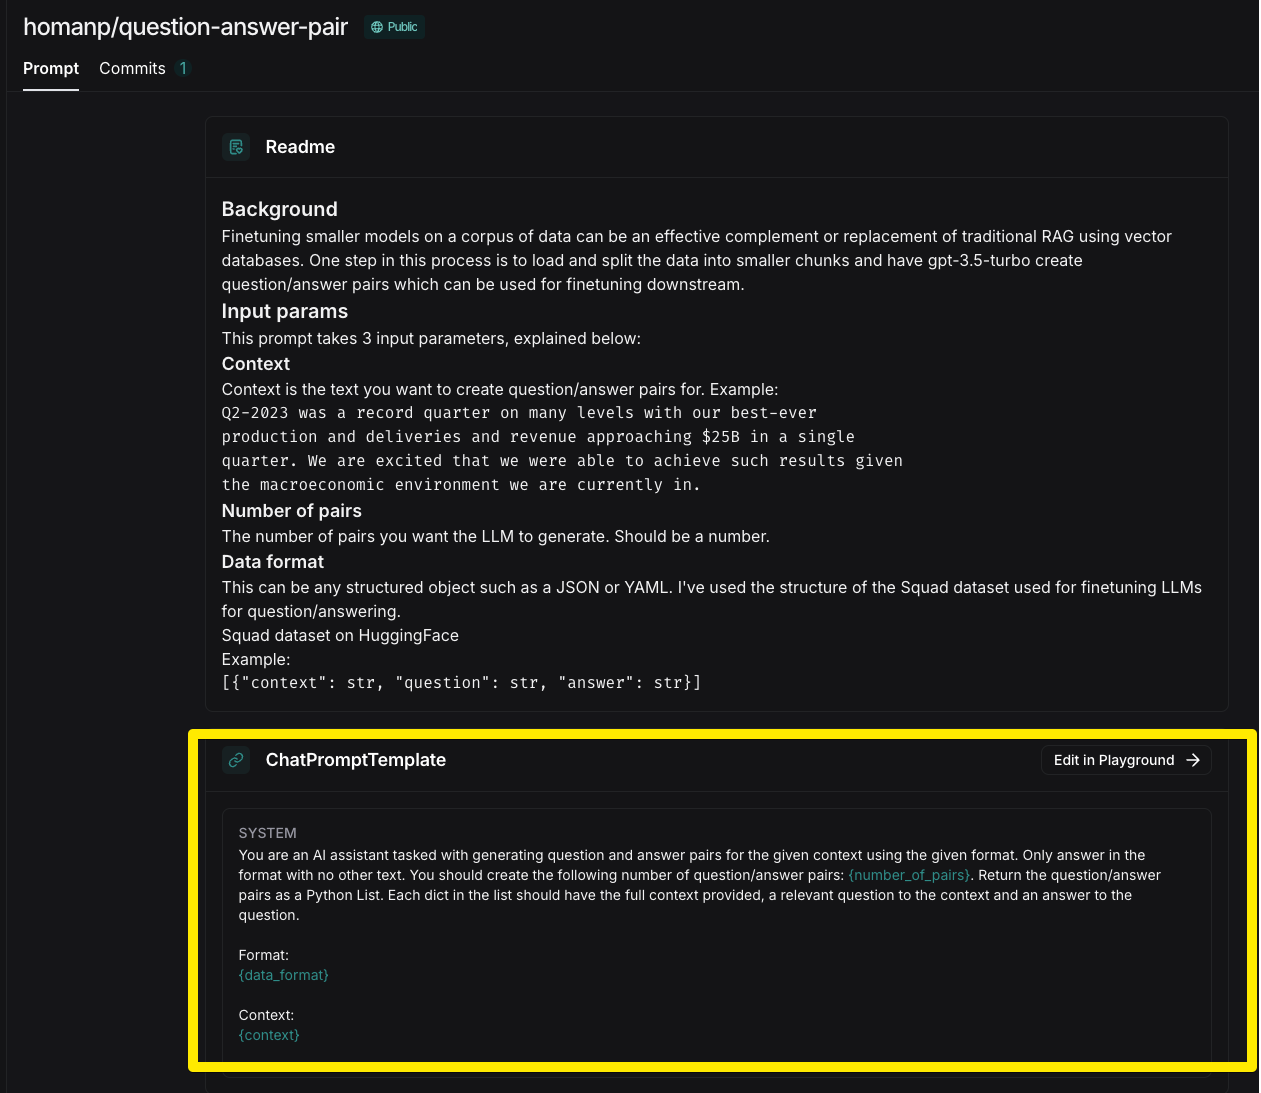

이렇게 쓰고싶은 프롬프트를 찾으면, 쓰고싶은 프롬프트의 포맷을 확인하고, 포맷에 맞춰서 넣으면 된답니다!

## 💡 실습 : 내 RAG 이 이렇게 성능이 좋아진다고...? 🥸

아래의 RAG 코드에서, RAG 프롬프트를 prompt hub에서 찾은 프롬프트로 대체해보세요.

찾은 프롬프트의 포맷에 맞춰넣는 것에 주의하세요!



In [ ]:
from langchain_community.vectorstores import FAISS
from langchain_community.document_loaders import WebBaseLoader
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain.document_loaders import PyPDFLoader


####################
####### RAG 챗봇 구축
###################

# 1. LLM 모델 불러오기
llm = ChatOpenAI(model="gpt-4o-mini")

# 2. 문서 불러오기
loader = PyPDFLoader("/content/[2024 한권으로 OK 주식과 세금].pdf")
docs = loader.load()

# 3. 문서 chunking 하기
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)

# 4. 자른 chunk들을 embedding 하기
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")

# 5. vector store 구축하기
vectorstore = FAISS.from_documents(documents=splits, embedding=embeddings)

# 6. retriever 구축하기
retriever = vectorstore.as_retriever()

# 7. 프롬프트 템플릿 구축하기
prompt = hub.pull("krunal/more-crafted-rag-prompt")

# 8. 1~7. 요소들을 chain으로 조합하여 RAG 구축 완료
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)


####################
####### 구축한 RAG 챗봇 실행
###################

rag_chain.invoke("상장주식 대주주 기준이 50억 원 이상으로 완화되었는데 언제부터 적용되는 건가요?")

/usr/local/lib/python3.10/dist-packages/langsmith/client.py:241: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


'상장주식 대주주 기준이 50억 원 이상으로 완화된 것은 2023년 12월 21일에 발표된 소득세법 시행령 개정에 따른 것입니다. 이 기준은 2023년 말 기준으로 적용되며, 2024년 1월 1일 이후에 양도하는 주식부터 적용됩니다. 따라서, 2024년 상반기 양도분에 대해서는 2024년 8월 예정신고 시점부터 이 기준이 반영될 것입니다. 즉, 2023년 말 기준으로 종목당 주식 보유액이 50억 원 미만인 경우, 내년도 양도소득세에 대한 과세가 면제됩니다.'